In [49]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

In [60]:
img = plt.imread('../sample_data/sample.jpg')

In [59]:
w, h, d = img.shape
image_array = img.reshape(w*h, d)
image_array = image_array / 255
image_array

array([[0.96470588, 0.96862745, 0.98823529],
       [0.96470588, 0.96862745, 0.98823529],
       [0.96078431, 0.96470588, 0.98431373],
       ...,
       [0.65098039, 0.74117647, 0.79607843],
       [0.67058824, 0.75686275, 0.81176471],
       [0.67843137, 0.76470588, 0.81960784]], shape=(17088000, 3))

In [54]:
image_array_sample = shuffle(image_array, random_state=1)
image_array_sample

array([[0.16862745, 0.3254902 , 0.37254902],
       [0.01176471, 0.08627451, 0.10196078],
       [0.04705882, 0.25490196, 0.3254902 ],
       ...,
       [0.62352941, 0.7372549 , 0.80784314],
       [0.74901961, 0.81568627, 0.84313725],
       [0.55294118, 0.6745098 , 0.74509804]], shape=(17088000, 3))

In [55]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(image_array_sample)
labels_ = kmeans.labels_
centroids = kmeans.cluster_centers_
labels = kmeans.predict(image_array_sample)
labels.size

17088000

In [56]:
def reduce_image(centroids, labels, w, h, d):
    image = np.zeros((w,h,d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = centroids[labels[label_idx]]
            label_idx+=1
    return image

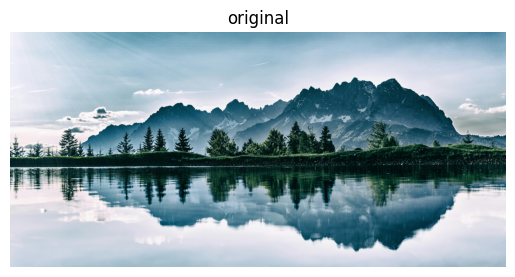

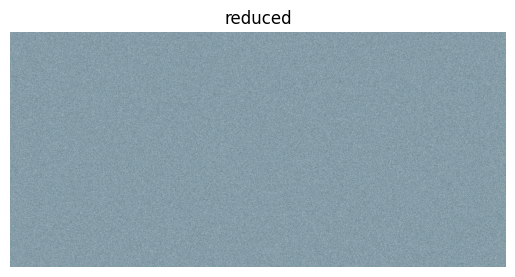

In [ ]:
plt.figure(1)
plt.axis('off')
plt.title('original')
plt.imshow(img)
plt.show()
plt.figure(2)
plt.axis('off')
plt.title('reduced')
plt.imshow(reduce_image(centroids,labels,w,h,d))
plt.show()